In [1]:
import numpy as np

In [52]:
def compute_Sg(S, angles=(0,0,0)):
    alpha, beta, gamma = np.radians(angles)
    R_g = np.array([[np.cos(alpha) * np.cos(beta),np.sin(alpha) * np.cos(beta),-np.sin(beta)],
                [np.cos(alpha) * np.sin(beta) * np.sin(gamma) - np.sin(alpha) * np.cos(gamma),np.sin(alpha) * np.sin(beta) * np.sin(gamma) + np.cos(alpha) * np.cos(gamma),np.cos(beta) * np.sin(gamma)],
                [np.cos(alpha) * np.sin(beta) * np.cos(gamma) + np.sin(alpha) * np.sin(gamma),np.sin(alpha) * np.sin(beta) * np.cos(gamma) - np.cos(alpha) * np.sin(gamma),np.cos(beta) * np.cos(gamma)]])
    return np.dot(R_g.T, np.dot(S, R_g))

def compute_Sb(S, angles_G=(0,0,0), angles_B=(0,0)):
    delta, phi = np.radians(angles_B)
    
    Rb = np.array([[np.cos(delta) * np.cos(phi), np.sin(delta) * np.cos(phi), np.sin(phi)],
                  [np.sin(delta), np.cos(delta), 0.0],
                  [np.cos(delta) * np.sin(phi), np.sin(delta) * np.sin(phi), np.cos(phi)]])
    
    Sg = compute_Sg(S, angles_G)
    
    return np.dot(Rb, np.dot(Sg, Rb.T))

def compute_wellbore_stress(sb_eff, nu, theta, delta_p):
    theta = np.radians(theta)
    sZZ = S[2,2] - 2.0 * nu * (S[0,0] - S[1,1]) * np.cos(2 * theta) - 4.0 * nu * S[0,1] * np.sin(2.0 * theta)
    stt = S[0,0] + S[1,1] - 2.0 * (S[0,0] - S[1,1]) * np.cos(2.0 * theta) - 4.0 * S[0,1] * np.sin(2.0 * theta) - delta_p
    ttz = 2.0 * (S[1,2] * np.cos(theta) - S[0,2] * np.sin(theta))
    srr = delta_p
    
    return (sZZ, stt, ttz, srr)

def compute_max_tangent_stress(Sb_eff, nu, theta, delta_p):
    sZZ, stt, ttz, srr = compute_wellbore_stress(Sb_eff, nu, theta, delta_p)
    
    return 0.5 * (sZZ + stt + np.sqrt((sZZ-stt)**2+4*ttz**2))

def compute_min_tangent_stress(Sb_eff, nu, theta, delta_p):
    sZZ, stt, ttz, srr = compute_wellbore_stress(Sb_eff, nu, theta, delta_p)
    
    return 0.5 * (sZZ + stt - np.sqrt((sZZ-stt)**2+4*ttz**2))

In [47]:
S = np.array([[30,0,0],
              [0,25,0],
              [0,0,20]])

In [53]:
Sb = compute_Sb(S, angles_G=(90,0,0),angles_B=(20,20))

In [54]:
Sb_eff = Sb - 20*np.eye(3)

In [55]:
smin = compute_min_tangent_stress(Sb_eff, 0.2,0.0,20)

In [56]:
smin

18.0

In [57]:
smax = compute_max_tangent_stress(Sb_eff, 0.2,0.0,20)

In [58]:
smax

25.0

In [59]:
theta = np.linspace(0, 360, num=100)

In [60]:
smax = [compute_max_tangent_stress(Sb_eff, 0.2,i,20) for i in theta]

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

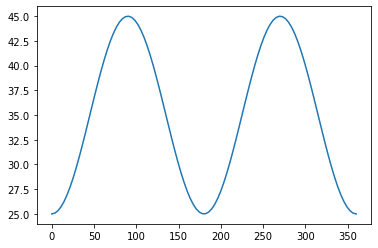

In [62]:
plt.plot(theta, smax)